# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from datetime import date


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

mainurl = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 


citydata = []


print("Beginning Data Retrieval     ")
print("-----------------------------")


record_count = 1
set_count = 1


for i, city in enumerate(cities):
        

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

  
    city_url = mainurl + "&q=" + city
    

    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))


    record_count += 1

   
    try:

        city_weather = requests.get(city_url).json()


        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        citydata.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    except:
        print("City not found. Skipping...")
        pass
              

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | agadir
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | shancheng
Processing Record 5 of Set 1 | buenavista
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | alexandria
Processing Record 10 of Set 1 | ekhabi
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | zhezkazgan
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | saint george
Processing Record 15 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | sobolevo
Processing Record 21 of Set 1 | touros
Processing Record 22 o

Processing Record 34 of Set 4 | thompson
Processing Record 35 of Set 4 | skage
City not found. Skipping...
Processing Record 36 of Set 4 | antofagasta
Processing Record 37 of Set 4 | havoysund
Processing Record 38 of Set 4 | prieska
Processing Record 39 of Set 4 | san patricio
Processing Record 40 of Set 4 | charters towers
Processing Record 41 of Set 4 | carbonear
Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | waiouru
Processing Record 44 of Set 4 | sioux lookout
Processing Record 45 of Set 4 | namatanai
Processing Record 46 of Set 4 | fort nelson
Processing Record 47 of Set 4 | hay river
Processing Record 48 of Set 4 | rottingdean
Processing Record 49 of Set 4 | terrasini
Processing Record 0 of Set 5 | ternate
Processing Record 1 of Set 5 | ormara
Processing Record 2 of Set 5 | hithadhoo
Processing Record 3 of Set 5 | gravdal
Processing Record 4 of Set 5 | butaritari
Processing Record 5 of Set 5 | synya
Processing Record 6 of Set 5 | tianpeng
Processing Record 

Processing Record 27 of Set 8 | saint-augustin
Processing Record 28 of Set 8 | swan hill
Processing Record 29 of Set 8 | ierapetra
Processing Record 30 of Set 8 | benguela
Processing Record 31 of Set 8 | meihekou
Processing Record 32 of Set 8 | kavaratti
Processing Record 33 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 34 of Set 8 | maldonado
Processing Record 35 of Set 8 | shablykino
Processing Record 36 of Set 8 | seoul
Processing Record 37 of Set 8 | valavanur
Processing Record 38 of Set 8 | vizinga
Processing Record 39 of Set 8 | charlestown
Processing Record 40 of Set 8 | giyon
Processing Record 41 of Set 8 | paamiut
Processing Record 42 of Set 8 | vanavara
Processing Record 43 of Set 8 | saskylakh
Processing Record 44 of Set 8 | santa rosa
Processing Record 45 of Set 8 | bykovo
Processing Record 46 of Set 8 | one hundred mile house
City not found. Skipping...
Processing Record 47 of Set 8 | ketchikan
Processing Record 48 of Set 8 | qasigiannguit
Processing 

Processing Record 13 of Set 12 | makakilo city
Processing Record 14 of Set 12 | pacific grove
Processing Record 15 of Set 12 | guajara-mirim
City not found. Skipping...
Processing Record 16 of Set 12 | north myrtle beach
Processing Record 17 of Set 12 | bilibino
Processing Record 18 of Set 12 | muncar
Processing Record 19 of Set 12 | durham
Processing Record 20 of Set 12 | vyazma
Processing Record 21 of Set 12 | gallup
Processing Record 22 of Set 12 | herrin
Processing Record 23 of Set 12 | dicabisagan
Processing Record 24 of Set 12 | karaul
City not found. Skipping...
Processing Record 25 of Set 12 | morrope
Processing Record 26 of Set 12 | beroroha
Processing Record 27 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 28 of Set 12 | asyut
Processing Record 29 of Set 12 | emba
Processing Record 30 of Set 12 | broome
Processing Record 31 of Set 12 | raudeberg
Processing Record 32 of Set 12 | kurchatov
Processing Record 33 of Set 12 | urengoy
Processing Record 34 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
citydata_pd = pd.DataFrame(citydata)
citydata_pd.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
citydata_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,55.80,70,83,7.52,NZ,1627520465
1,agadir,30.4202,-9.5982,68.45,78,9,3.11,MA,1627520465
2,kapaa,22.0752,-159.3190,87.78,70,92,5.01,US,1627520465
3,shancheng,34.7953,116.0817,68.94,97,100,19.39,CN,1627520466
4,buenavista,8.9769,125.4089,85.30,64,94,2.28,PH,1627520466


In [8]:
citydata_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,21.770291,17.942801,68.481093,72.566138,53.074074,7.591517,1.627520e+09
std,33.756747,92.867482,13.754125,19.467526,41.403660,5.135259,8.797314e+01
min,-54.800000,-175.200000,33.030000,18.000000,0.000000,0.000000,1.627520e+09
25%,-6.381950,-65.518500,57.785000,63.000000,6.000000,3.680000,1.627520e+09
50%,29.060500,21.548200,70.210000,77.000000,55.000000,6.490000,1.627521e+09
75%,50.615150,103.125950,79.235000,87.000000,100.000000,10.435000,1.627521e+09
max,78.218600,179.316700,105.440000,100.000000,100.000000,25.520000,1.627521e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity_citydata=citydata_pd[(citydata_pd["Humidity"] > 100)].index
humidity_citydata

Int64Index([], dtype='int64')

In [10]:
clean_citydata = citydata_pd.drop(humidity_citydata, inplace=False)
clean_citydata.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,55.80,70,83,7.52,NZ,1627520465
1,agadir,30.4202,-9.5982,68.45,78,9,3.11,MA,1627520465
2,kapaa,22.0752,-159.3190,87.78,70,92,5.01,US,1627520465
3,shancheng,34.7953,116.0817,68.94,97,100,19.39,CN,1627520466
4,buenavista,8.9769,125.4089,85.30,64,94,2.28,PH,1627520466


In [11]:
lats = clean_citydata["Lat"]
max_temps = clean_citydata["Max Temp"]
humidity = clean_citydata["Humidity"]
cloudiness = clean_citydata["Cloudiness"]
wind_speed = clean_citydata["Wind Speed"]

# Export the City_Data into a csv
clean_citydata.to_csv("../output_data/CityData.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

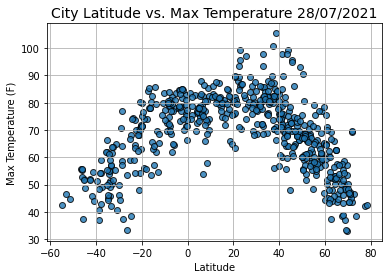

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
today = (date.today().strftime("%d/%m/%Y"))

# Giving The Title 
plt.title(f"City Latitude vs. Max Temperature {today}", fontsize=14)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid  (True)
# Save The Plot & Show 
plt.savefig("../output_data/Latitude vs. Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

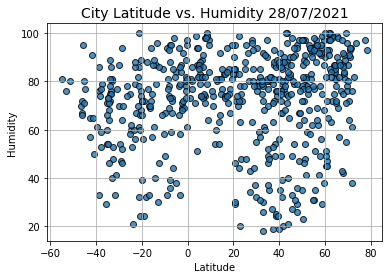

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

today = (date.today().strftime("%d/%m/%Y"))
# Giving The Title 
plt.title (f"City Latitude vs. Humidity {today}", fontsize=14)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid  (True)
# Save The Plot & Show 
plt.savefig("../output_data/Latitude vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

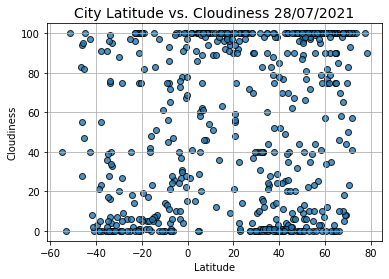

In [14]:
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


# Giving The Title 
plt.title (f"City Latitude vs. Cloudiness {today}", fontsize=14)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid  (True)
# Save The Plot & Show 
plt.savefig("../output_data/Latitude vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

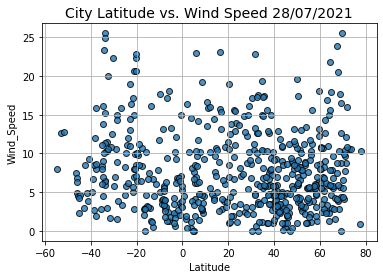

In [15]:
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


# Giving The Title 
plt.title (f"City Latitude vs. Wind Speed {today}", fontsize=14)
plt.ylabel("Wind_Speed")
plt.xlabel("Latitude")
plt.grid  (True)
# Save The Plot & Show 
plt.savefig("../output_data/Latitude vs. Wind Speed Plot.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [17]:
NorthernHem_df = citydata_pd.loc[(citydata_pd["Lat"] >= 0)]
SouthernHem_df = citydata_pd.loc[(citydata_pd["Lat"] < 0)]

The r-squared is: 0.4652386489563398


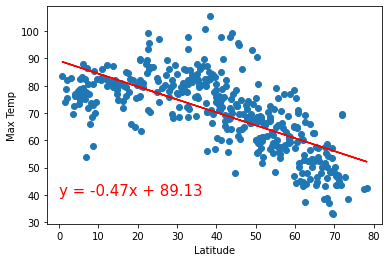

<Figure size 432x288 with 0 Axes>

In [18]:
# Linear regression on Northern Hemisphere
x_values = NorthernHem_df["Lat"]
y_values = NorthernHem_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(0,40))

# Save the figure
plt.savefig("../output_data/Northern Hemisphere Max Temp vs Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.604552081048972


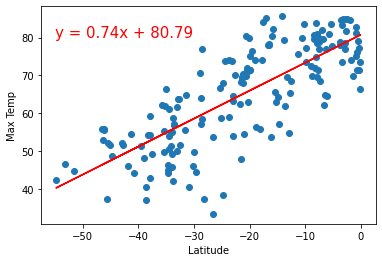

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = SouthernHem_df["Lat"]
y_values = SouthernHem_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 80))
plt.savefig("../output_data/Southern Hemisphere Max Temp vs Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0005571586828619073


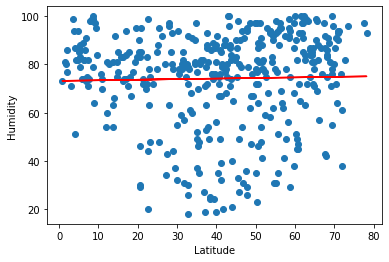

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = NorthernHem_df["Lat"]
y_values = NorthernHem_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(45,10))

plt.savefig("../output_data/ Northern Hemisphere Humidity(%) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013983461326990377


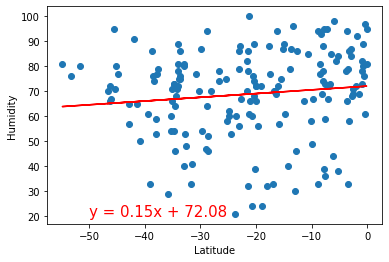

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = SouthernHem_df["Lat"]
y_values = SouthernHem_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

plt.savefig("../output_data/Southern Hemisphere Humidity(%) vs Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0009438703531776631


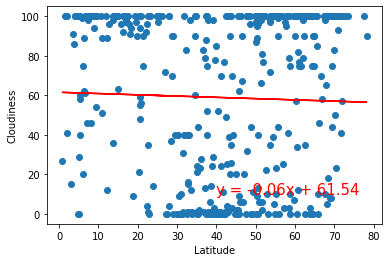

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = NorthernHem_df["Lat"]
y_values = NorthernHem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

plt.savefig("../output_data/Northern Hemisphere Cloudiness(%) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0066683190689889515


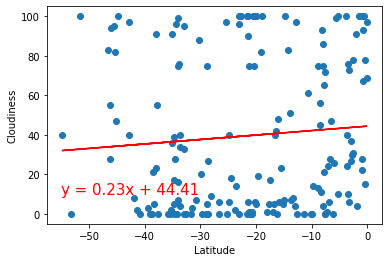

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = SouthernHem_df["Lat"]
y_values = SouthernHem_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,10))

plt.savefig("../output_data/Southern Hemisphere Cloudiness(%) vs Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 2.5543834834062254e-05


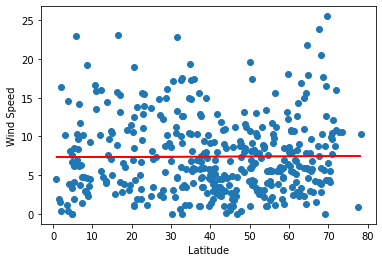

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = NorthernHem_df["Lat"]
y_values = NorthernHem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,28))

plt.savefig("../output_data/Northern Hemisphere Wind Speed (mph) vs Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0518529337198204


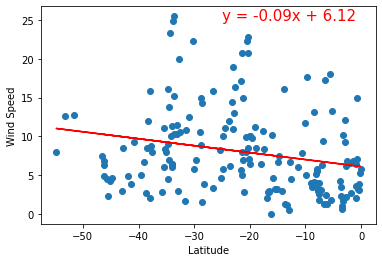

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = SouthernHem_df["Lat"]
y_values = SouthernHem_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-25, 25))

plt.savefig("../output_data/Southern Hemisphere Wind Speed (mph) vs Latitude Linear Regression.png")